<a href="https://colab.research.google.com/github/nishultomar/TensorflowExercises/blob/master/MNIST_Basic_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('/content/drive/My Drive/ML Exercise/MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/drive/My Drive/ML Exercise/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/drive/My Drive/ML Exercise/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /content/drive/My Drive/ML Exercise/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/ML Exercise/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
mnist.train.num_examples

55000

In [8]:
mnist.test.num_examples

10000

In [0]:
import matplotlib.pyplot as plt

In [10]:
mnist.train.images.shape

(55000, 784)

In [0]:
single_img = mnist.train.images[1].reshape(28,28)

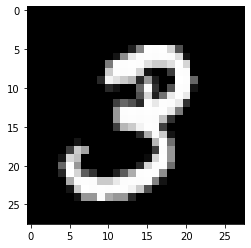

In [12]:
plt.imshow(single_img,cmap="gist_gray")

In [13]:
single_img.min()

0.0

In [14]:
single_img.max()

1.0

In [0]:
#y=mx+b

x = tf.placeholder(tf.float32, shape=[None,784])

In [0]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [0]:
y = tf.matmul(x,W) +b

In [0]:
y_true = tf.placeholder(tf.float32, shape=[None, 10])

In [19]:
#Loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [0]:
train = optimiser.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
  sess.run(init)
  
  for step in range(1000):
    batch_x,batch_y = mnist.train.next_batch(100)
    sess.run(train,feed_dict  = {x:batch_x,y_true:batch_y})
  correct_prediction = tf.equal(tf.arg_max(y,1), tf.arg_max(y_true,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print(sess.run(accuracy,feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.9182


In [0]:
z